In [1]:
# inputs

#run reduce funciton

#load data and plot

#load data and do IRF or step fit

#load data and do gausian fitting (lensh/lensv)

#Stack data

# inputs

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
import sys
import os
import time
import scipy
import scipy.io as scio
from scipy.optimize import curve_fit


from LCLSDataToolsNew.GeneralTools import *
from LCLSDataToolsNew.filterTools import *
from LCLSDataToolsNew.diffSignalTools import *
from LCLSDataToolsNew.binningToolsErr import *
from LCLSDataToolsNew.anisotropyToolsAll import *
from LCLSDataToolsNew.SVDTools import *
from LCLSDataToolsNew.SetUpFns import *
from LCLSDataToolsNew.DiffBinFns import *
from LCLSDataToolsNew.ReduceFns import *
from LCLSDataToolsNew.IRFtools import *
from LCLSDataToolsNew.plottingTools import *

print('Import Complete!')

exper = 'xcsx51920'
### ffb ###
# smalldata_folder='/cds/data/drpsrcf/xcs/'+exper+'/scratch/hdf5/smalldata/'
### call ffb from psana ###
smalldata_folder='/reg/data/drpsrcf/xcs/'+exper+'/scratch/hdf5/smalldata/'
### psana ###
# smalldata_folder='/reg/d/psdm/xcs/'+exper+'/hdf5/smalldata/'


outpath='/reg/d/psdm/xcs/'+exper+'/results/ReducedData/'
# outpath='/cds/home/s/slraj/code/ScatteringCode/'


Import Complete!


# no scan var

In [3]:
varDict = {
        'ipm4'          : 'ipm4/sum',
        'ipm5'          : 'ipm5/sum',
        'xray_status'   : 'lightStatus/xray',
        'laser_status'  : 'lightStatus/laser',
        'ebeam_hv'      : 'ebeam/photon_energy',
        # 'scan_vec'      : 'scan/var0',
        'laser_diode'   : '/diodeGon/channels/',
    
        ## tt variables
        'ttCorr'        : 'tt/ttCorr',
        'ttAMPL'        : 'tt/AMPL',
        'ttFWHM'        : 'tt/FLTPOSFWHM',
        'ttFLTPOS'      : 'tt/FLTPOS',
        # 'ttFLTPOS_PS'   : 'tt/FLTPOS_PS', ## in picoseconds
        # 'ttREFAMPL'     : 'tt/REFAMPL',
        'encoder'       : 'enc/lasDelay',
        'lxt'           : 'epics/lxt' , 
        # 'lxt_ttc'       : 'epics/lxt_ttc',
        
        ## scattering variables
        'azav'      : 'epix10k2M/azav_azav',
        'qs'        : 'UserDataCfg/epix10k2M/azav__azav_q',
        'phis'      :  'UserDataCfg/epix10k2M/azav__azav_phiVec',
    
        ## scattering detector error
        #'azav_sqr'     :  'epix10k2M/azav_azav_square',
        # 'pix_per_azav'  :  'UserDataCfg/epix10k2M/azav__azav_norm',
    
        # ## spectroscopy variables
        # 'epix_roi0'        : 'epix_1/ROI_0_area',
        # 'epix_roi0_sum'    : 'epix_1/ROI_0_sum',
        # 'droplet_x'        : 'epix_1/ragged_droplet_photon_j', #nondispersive axis
        # 'droplet_y'        :  'epix_1/ragged_droplet_photon_i', #energy dispersive
        # 'epix_roi0_limits' : 'UserDataCfg/epix_1/ROI_0__ROI_0_ROI',

        }

In [4]:
# setbins=np.arange(0.e-12,1e-12,.01e-12)
setbins=np.arange(-1e-12,5e-12,.05e-12)
print(setbins.shape)

paramDict= {
        # 'binSetup'  : 'unique',
        'binSetup'  : 'points',
        'binSet2'   : 300,
        # 'binSetup'  : 'fixed',
        # 'binSet2'   : setbins,
        'binMethod' : 'ave', 
        'qnorm'     : (3,4), 
        'qrange'    : (.2,4.5),
        'show_filters'  : True, #show filter plots
        'useAzav_std'  : False, 
        'azav_percent_filter' : None, # if nonzero, use azav_std as filter
        'ipm'    : 4, # select ipm to use
        'corr_filter' : False,
        'ipm_filter' : (1,None), # if corr_filter, can set limits for ipm intensity
        'Iscat_threshold'  : 1, #lower limit for 
    
        'use_TT'   :  False,  #options are True, False, and 'filter'  ('filter is for filtering only) 
        'scan_var' : None,
        'x_var'   : None,
    
        't0_corr' : None,  #false or float offset for time zero
        'enforce_iso': False, #enforce isotropic off shots?
        'energy_corr' : False, # ebeam photon energy correction
        'NonLin_corr': None, #None, SVD, poly, or SVDbyBin
        
        'AdjSub'    : 50, #number of adjascent off shots to average and subtract, -1 subtracts all
        'aniso'  : False,
        'shift_n' :0,
        'xstat' : True,
    
        'showSVD': False, #do svd
        'SVD_n': 4, # number of svd components
        'slice_plot':None, #how to slice up plots displayed at end
        'smooth':None, #smoothinng before svd?
    
    
    
        }



(120,)


loading  /reg/data/drpsrcf/xcs/xcsx51920/scratch/hdf5/smalldata/xcsx51920_Run0523.h5
scan variable is  newdelay
finished loading h5
calculated Iscat
setupFilters - done!
3.675811529159546  seconds


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:90: RuntimeWarning: Mean of empty slice
  darkMean = np.nanmean(dark,0)


x-ray off subtraction done!
normalize data


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:289: RuntimeWarning: Mean of empty slice
  cake=np.nanmean(cspad_azav[early_x,:,:]/normal_factor[early_x,None,None],0) #normalize by norm


normalize data done!
starting difference signal
Difference Signal Done!
13.271101951599121  seconds
Averaging all shots difference signals


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:357: RuntimeWarning: Mean of empty slice
  diff_bin=np.nanmean(onData,axis=0)
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.10/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/ReduceFns.py:268: RuntimeWarning: invalid value encountered in long_scalars
  logscan=(np.abs(np.nanmax(ts)/np.nanmin(ts)))>1e3 # is the range we are scanning a lot of orders of magnitude? If so, plot nicer


Average done!
15.46109414100647  seconds
saved output to  /cds/home/s/slraj/code/ScatteringCode/npy/xcsx51920_Run0523_out.npy
plotting azavs
logscan False
(1, 883)
(883,)
done
16.223702669143677  seconds


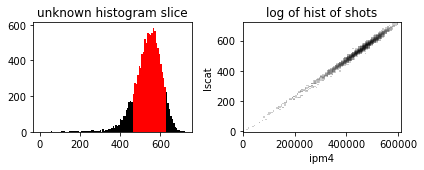

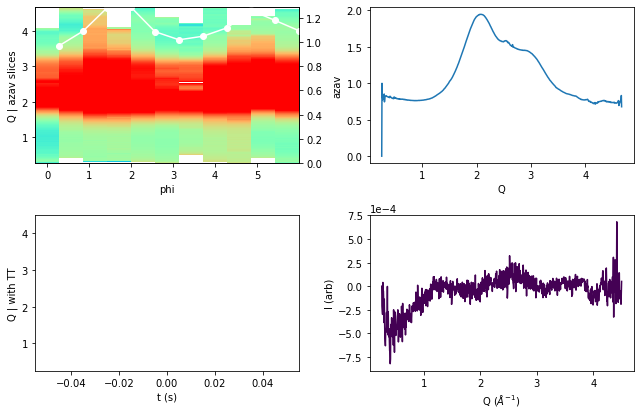

In [16]:
inDir=smalldata_folder
outDir='/cds/home/s/slraj/code/ScatteringCode/'

runs=[523]



for run in runs:
    fname=inDir+exper+'_Run%04i.h5'%run
    print('loading ', fname)
    outDict={}
    then=time.time()
    LoadH5(fname,varDict,paramDict, outDict)
    setupFilters(paramDict,outDict)
    IscatFilters(paramDict,outDict)
    # eBeamFilter(paramDict,outDict)
    if paramDict['use_TT']==True or paramDict['use_TT']=='filter':
        TTfilter(paramDict,outDict)
    now = time.time() #Time after it finished
    print(now-then, " seconds")
    saveReduction(outDir,outDict)
    
    outDict['xs']=np.arange(outDict['h5Dict']['azav'].shape[0])
    # MakeScanAx(paramDict,outDict,tt_corrNew=None)
    DarkSubtract(paramDict,outDict)
    if paramDict['energy_corr']:
        EnergyCorr(paramDict,outDict)
    if paramDict['NonLin_corr'] is not None:
        DetectorNonlinCorr(paramDict,outDict)
    NormalFactor(paramDict,outDict)
    doDifference(paramDict,outDict)
    now = time.time() #Time after it finished
    print(now-then, " seconds")

    AveAllShots(paramDict, outDict)
    now = time.time() #Time after it finished
    print(now-then, " seconds")

    if paramDict['aniso']:
        doAnisotropy(paramDict,outDict)
    saveDictionary(outDir+'npy/',paramDict,outDict)
    overviewPlot(outDir+'figures/',paramDict,outDict)
    now = time.time() #Time after it finished
    print(now-then, " seconds")

# load and plot

In [15]:
fpath='/reg/d/psdm/xcs/xcsx51920/results/ReducedData/npy/'
nnames=['523']
allout={}
S0=[]
S2=[]
for nn in nnames:
    allout[nn]=np.load(fpath+exper+'_Run%04i_out.npy'%int(nn),allow_pickle=True).item()
    S0.append(allout[nn]['S0'])
    S2.append(allout[nn]['S2'])    
S0=np.array(S0).squeeze()
S2=np.array(S2).squeeze()
Power=np.array([33.25,20.65,9.80,3.85])
qs=allout[nn]['qs']

outDict={'allout':allout, 'runs':nnames,'qs':qs,'power':Power,'S0':S0,'S2':S2}
np.save('/reg/d/psdm/xcs/xcsx51920/results/ReducedData/stack_npy/combo_332_to_225_pwr.npy',outDict)

TypeError: Dimensions of C (883, 34) are incompatible with X (4) and/or Y (883); see help(pcolormesh)

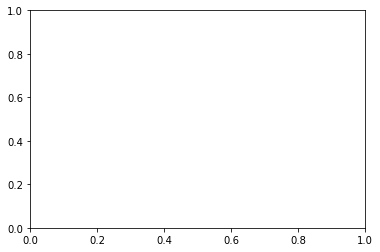

In [8]:
plot_2d(Power,qs,S0)
plt.suptitle('S0')
plt.xlabel('laser power (uJ)')
plot_2d(Power,qs,S2)
plt.suptitle('S2')
plt.xlabel('laser power (uJ)')